In [4]:
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')
import hvplot.pandas
import math

import yfinance as yf
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime


ModuleNotFoundError: No module named 'alpaca_trade_api'

In [82]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv('api.env')

True

In [21]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# creates directory for output data if it doesn't exist
directory = "output_data"
if not os.path.exists(directory):
    os.makedirs(directory)

In [84]:
# use this cell to get the risk level from the questionary
# for now I'm using mid as default

risk = "high"

In [153]:
SPDR_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "SPY"]

In [154]:
# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2018-07-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-05-04", tz="America/New_York").isoformat()

In [192]:

# add cryptos
# maybe make a script


In [6]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
ticker_data = api.get_bars(
    SPDR_sectors,
    timeframe,
    start=start_date,
    end=end_date
).df

display(ticker_data)
ticker_data.to_csv("./output_data/ticker_data.csv", sep=',', header=True, encoding="utf-8")

NameError: name 'api' is not defined

In [157]:
# Reorganize the DataFrame
# Separate ticker data
#SPDR_sectors = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]

# communications
XLC = ticker_data[ticker_data['symbol']=='XLC'].drop('symbol', axis=1)
# consumer discrestionary
XLY = ticker_data[ticker_data['symbol']=='XLY'].drop('symbol', axis=1)
# consumer staples
XLP = ticker_data[ticker_data['symbol']=='XLP'].drop('symbol', axis=1)
# energy
XLE = ticker_data[ticker_data['symbol']=='XLE'].drop('symbol', axis=1)
# finacial
XLF = ticker_data[ticker_data['symbol']=='XLF'].drop('symbol', axis=1)
# healthcare
XLV = ticker_data[ticker_data['symbol']=='XLV'].drop('symbol', axis=1)
# industrials
XLI = ticker_data[ticker_data['symbol']=='XLI'].drop('symbol', axis=1)
# materials
XLB = ticker_data[ticker_data['symbol']=='XLB'].drop('symbol', axis=1)
# real estate
XLRE = ticker_data[ticker_data['symbol']=='XLRE'].drop('symbol', axis=1)
# tech
XLK = ticker_data[ticker_data['symbol']=='XLK'].drop('symbol', axis=1)
# utilities
XLU = ticker_data[ticker_data['symbol']=='XLU'].drop('symbol', axis=1)
# SPY
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([XLC, XLY, XLP, XLE, XLF, XLV, XLI, XLB, XLRE, XLK, XLU, SPY],
                axis=1, 
                keys=["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "SPY"]
)

XLC_close = ticker_data["XLC"].filter(['close'])
XLY_close = ticker_data["XLY"].filter(['close'])
XLP_close = ticker_data["XLP"].filter(['close'])
XLE_close = ticker_data["XLE"].filter(['close'])
XLF_close = ticker_data["XLF"].filter(['close'])
XLV_close = ticker_data["XLV"].filter(['close'])
XLI_close = ticker_data["XLI"].filter(['close'])
XLB_close = ticker_data["XLB"].filter(['close'])
XLRE_close = ticker_data["XLRE"].filter(['close'])
XLK_close = ticker_data["XLK"].filter(['close'])
XLU_close = ticker_data["XLU"].filter(['close'])
SPY_close = ticker_data["SPY"].filter(['close'])

close_data_all = pd.concat([XLC_close, XLY_close, XLP_close, XLE_close, XLF_close, XLV_close, XLI_close, XLB_close, XLRE_close, XLK_close, XLU_close, SPY_close],
                axis=1, 
                keys=["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "SPY"]
)

display(close_data_all)
close_data_all.to_csv("./output_data/close_data_all.csv", sep=",", header=True, encoding="utf-8")

,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,SPY
,close,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,,
2018-07-02 04:00:00+00:00,49.8400,109.45,51.25,74.79,26.72,83.72,71.78,57.81,32.52,70.09,52.33,271.84
2018-07-03 04:00:00+00:00,49.2300,108.90,51.35,75.12,26.46,83.92,71.56,57.66,32.71,69.26,52.48,270.88
2018-07-05 04:00:00+00:00,49.9799,109.44,52.07,75.21,26.53,84.80,71.89,58.16,33.14,70.24,52.78,273.02
2018-07-06 04:00:00+00:00,50.7700,110.30,52.22,75.67,26.67,86.01,72.16,58.45,33.28,71.06,53.17,275.36
2018-07-09 04:00:00+00:00,51.0600,111.62,52.02,76.82,27.29,86.60,73.48,58.98,32.97,71.60,51.53,277.90
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-28 04:00:00+00:00,59.9000,147.86,77.44,85.13,33.17,133.53,100.00,80.55,37.75,150.83,68.98,415.93
2023-05-01 04:00:00+00:00,59.8900,146.40,77.50,84.17,33.08,134.22,100.54,80.51,37.40,150.92,69.10,415.51


<AxesSubplot:xlabel='timestamp'>

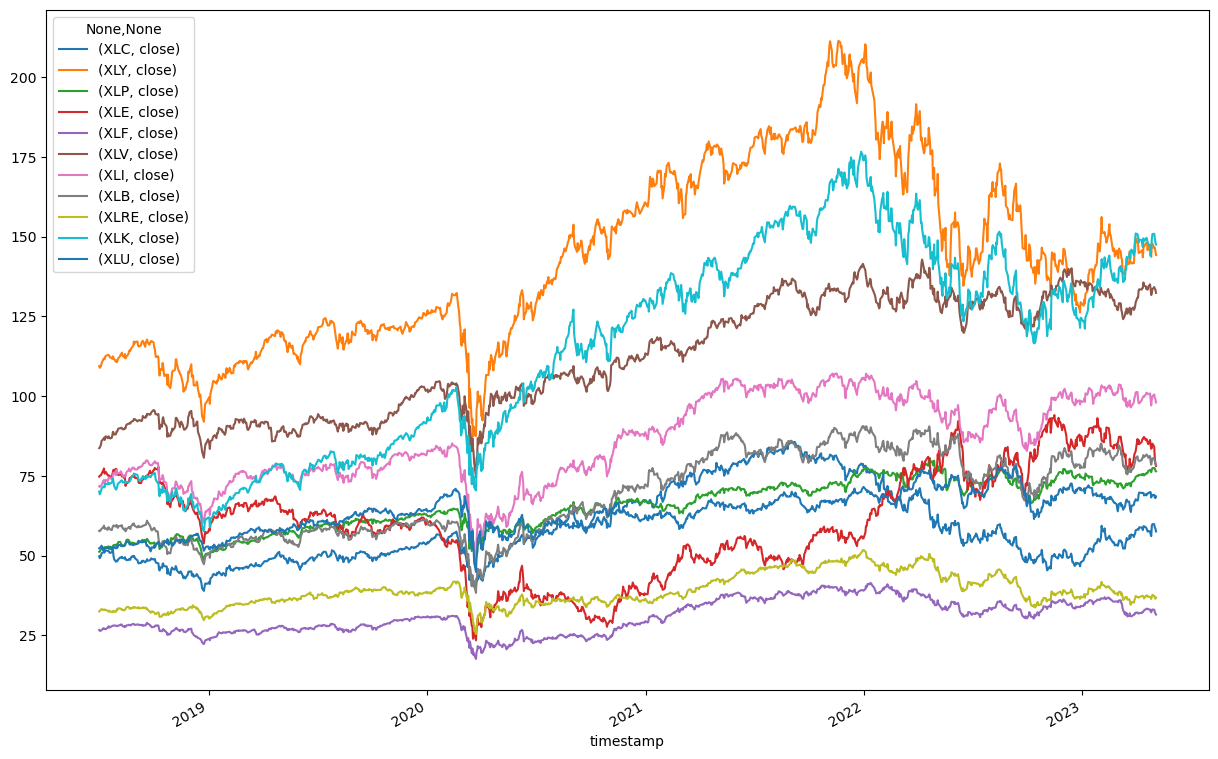

In [161]:
close_data = close_data_all.drop(["SPY"], axis=1)
close_data_fig = close_data_returns.plot(kind='box', title = "Sectors pct changes", figsize=(15, 5))
close_data_fig.savefig("./output_data/close_data_plot.pdf")
close_data_fig

<AxesSubplot:title={'center':'Sectors pct changes'}>

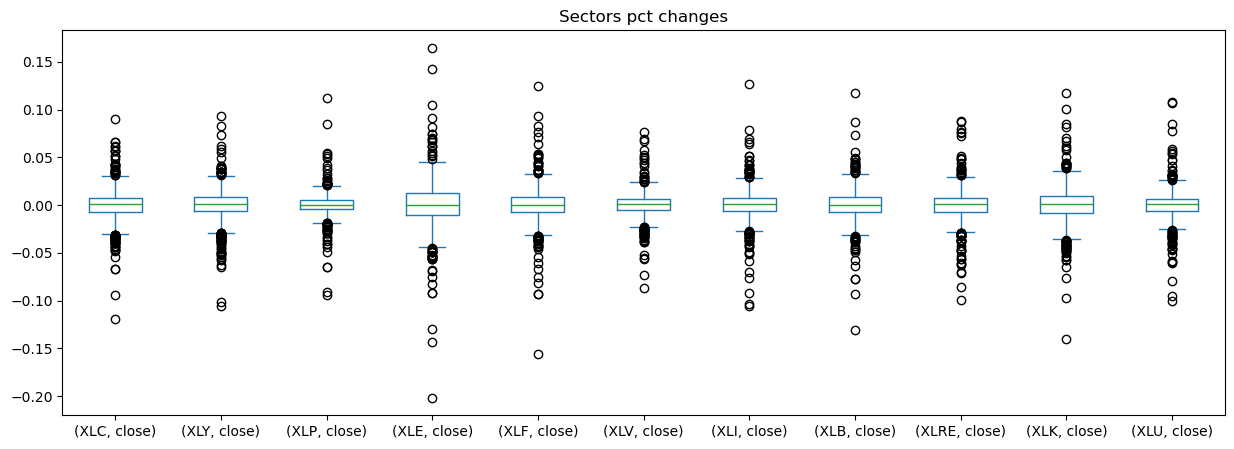

In [162]:
close_data_returns = close_data.pct_change()
close_data_returns_fig = close_data_returns.plot(kind='box', title = "Sectors pct changes", figsize=(15, 5))
close_data_returns_fig.savefig("./output_data/close_data_returns_plot.pdf")

In [163]:
# STD 

close_data_std = close_data_returns.std()
annualized_close_data_std = close_data_std * math.sqrt(252)
display(annualized_close_data_std.sort_values())

annualized_close_data_std.to_csv("./output_data/annualized_close_data_std.csv", sep=',', enconding="utf-8")

#rolling_close_data_std = close_data_returns.rolling(21).std()
#rolling_close_data_std.plot(
#    legend=True, figsize=(15, 10), title="Rolling std 21")


XLP   close    0.180278
XLV   close    0.192173
XLU   close    0.224740
XLRE  close    0.240135
XLI   close    0.241447
XLB   close    0.248997
XLC   close    0.253009
XLY   close    0.256560
XLF   close    0.269098
XLK   close    0.284512
XLE   close    0.368401
dtype: float64

In [164]:
# SHARPE RATIOS

annual_avg_returns_df = close_data_returns.mean() * 252
annual_avg_returns_df.sort_values()

close_sharpe_ratios_df = annual_avg_returns_df / annualized_close_data_std
display(close_sharpe_ratios_df.sort_values())

close_sharpe_ratios_df.to_csv("./output_data/close_sharpe_ratios.csv", sep=',', encoding="utf-8")

XLE   close    0.210074
XLRE  close    0.228432
XLC   close    0.245480
XLF   close    0.263095
XLY   close    0.351577
XLU   close    0.361413
XLB   close    0.377503
XLI   close    0.388164
XLP   close    0.549520
XLV   close    0.589675
XLK   close    0.684048
dtype: float64

In [172]:
# BETA

SP500_variance_df = close_data_all["SPY"].rolling(60).var()
SP500_variance_df.tail()

SP500_variance_df.to_csv("./output_data/SP500_variance.csv", sep=',', encoding="utf-8")

,close
timestamp,
2023-04-28 04:00:00+00:00,72.951021
2023-05-01 04:00:00+00:00,72.427447
2023-05-02 04:00:00+00:00,72.036643
2023-05-03 04:00:00+00:00,71.730318
2023-05-04 04:00:00+00:00,69.572874


In [189]:
# Energy
XLE_COvariance_df = close_data["XLE"].rolling(60).cov(close_data_all["SPY"])
XLE_Beta_df = XLE_COvariance_df / SP500_variance_df

# Real Estate
XLRE_COvariance_df = close_data["XLRE"].rolling(60).cov(close_data_all["SPY"])
XLRE_Beta_df = XLRE_COvariance_df / SP500_variance_df

# Communications
XLC_COvariance_df = close_data["XLC"].rolling(60).cov(close_data_all["SPY"])
XLC_Beta_df = XLC_COvariance_df / SP500_variance_df

# Financial
XLF_COvariance_df = close_data["XLF"].rolling(60).cov(close_data_all["SPY"])
XLF_Beta_df = XLF_COvariance_df / SP500_variance_df

# cons discretionary
XLY_COvariance_df = close_data["XLY"].rolling(60).cov(close_data_all["SPY"])
XLY_Beta_df = XLY_COvariance_df / SP500_variance_df

# utilities
XLU_COvariance_df = close_data["XLU"].rolling(60).cov(close_data_all["SPY"])
XLU_Beta_df = XLU_COvariance_df / SP500_variance_df

# Materials
XLB_COvariance_df = close_data["XLB"].rolling(60).cov(close_data_all["SPY"])
XLB_Beta_df = XLB_COvariance_df / SP500_variance_df

# Industrials
XLI_COvariance_df = close_data["XLI"].rolling(60).cov(close_data_all["SPY"])
XLI_Beta_df = XLI_COvariance_df / SP500_variance_df

# Communications
XLP_COvariance_df = close_data["XLP"].rolling(60).cov(close_data_all["SPY"])
XLP_Beta_df = XLP_COvariance_df / SP500_variance_df

# Financial
XLV_COvariance_df = close_data["XLV"].rolling(60).cov(close_data_all["SPY"])
XLV_Beta_df = XLV_COvariance_df / SP500_variance_df

# cons discretionary
XLK_COvariance_df = close_data["XLK"].rolling(60).cov(close_data_all["SPY"])
XLK_Beta_df = XLK_COvariance_df / SP500_variance_df

Beta_df = pd.concat([XLE_Beta_df, XLRE_Beta_df, XLC_Beta_df, XLF_Beta_df, XLY_Beta_df, XLU_Beta_df, XLB_Beta_df, XLI_Beta_df, XLP_Beta_df, XLV_Beta_df, XLK_Beta_df], 
                axis=1, 
                keys=["XLE", "XLRE", "XLC", "XLF", "XLY", "XLU", "XLB", "XLI", "XLP", "XLV", "XLK"])

Beta_df.tail()

Beta_df.to_csv("./output_data/Beta.csv", sep=',', header=True, encoding="utf-8")

,XLE,XLRE,XLC,XLF,XLY,XLU,XLB,XLI,XLP,XLV,XLK
,close,close,close,close,close,close,close,close,close,close,close
timestamp,,,,,,,,,,,
2023-04-28 04:00:00+00:00,0.281068,0.094562,0.192688,0.079732,0.370325,0.157162,0.171039,0.115589,0.138099,0.341178,0.329856
2023-05-01 04:00:00+00:00,0.277230,0.082078,0.194497,0.069788,0.343603,0.157022,0.158974,0.107816,0.149408,0.345897,0.353911
2023-05-02 04:00:00+00:00,0.269326,0.074552,0.195802,0.062240,0.335691,0.158268,0.152783,0.102033,0.156681,0.348474,0.369067
2023-05-03 04:00:00+00:00,0.263539,0.069512,0.197128,0.056775,0.329222,0.158082,0.148967,0.098063,0.160598,0.350737,0.380221
2023-05-04 04:00:00+00:00,0.257985,0.063117,0.197313,0.048310,0.322514,0.160480,0.143565,0.092673,0.168576,0.355509,0.394390


In [190]:
# Set the tickers for both the bond and stock portion of the portfolio
if risk == "high":
    tickers = ["XLK", "XLV", "XLY", "XLE", "TMF", "TYD"]
    
elif risk == "mid":
    tickers = ["XLC", "XLU", "XLB", "XLP", "TLT", "IEF"]
    
elif risk == "low":
    tickers = ["XLRE", "XLF", "XLI", "SHY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

In [191]:
# Use the hvplot to plot the close for each ticker
if risk == "high":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.15, 0.15, 0.15, 0.15,0.20, 0.20],
        num_simulation=500,
        num_trading_days=252*10,
    )

if risk == "mid":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.15, 0.15, 0.15, 0.15, 0.20, 0.20],
        num_simulation=500,
        num_trading_days=252*10,
    )

if risk == "low":
    MC_simulation = MCSimulation(
        portfolio_data=close_data,
        weights=[0.20, 0.20, 0.20, 0.20, 0.20],
        num_simulation=500,
        num_trading_days=252*10,
    )

# Review the simulation input data
MC_simulation.portfolio_data.head()
MC_simulation.portfolio_data.to_csv("MC_simulation_portfolio.csv", sep=',', header=True, encoding="utf-8")

XLC                  XLY                 XLP  \
                             close daily_return   close daily_return  close   
timestamp                                                                     
2018-07-02 04:00:00+00:00  49.8400          NaN  109.45          NaN  51.25   
2018-07-03 04:00:00+00:00  49.2300    -0.012239  108.90    -0.005025  51.35   
2018-07-05 04:00:00+00:00  49.9799     0.015233  109.44     0.004959  52.07   
2018-07-06 04:00:00+00:00  50.7700     0.015808  110.30     0.007858  52.22   
2018-07-09 04:00:00+00:00  51.0600     0.005712  111.62     0.011967  52.02   

                                          XLE                 XLF  \
                          daily_return  close daily_return  close   
timestamp                                                           
2018-07-02 04:00:00+00:00          NaN  74.79          NaN  26.72   
2018-07-03 04:00:00+00:00     0.001951  75.12     0.004412  26.46   
2018-07-05 04:00:00+00:00     0.014021  75.21     0.001198  26.53   
2018-07-06 04:00:00+00:00     0.002881  75.67     0.006116  26.67   
2018-07-09 04:00:00+00:00    -0.003830  76.82     0.015198  27.29   

                                        ...    XLI                 XLB  \
                          daily_return  ...  close daily_return  close   
timestamp                               ...                              
2018-07-02 04:00:00+00:00          NaN  ...  71.78          NaN  57.81   
2018-07-03 04:00:00+00:00    -0.009731  ...  71.56    -0.003065  57.66   
2018-07-05 04:00:00+00:00     0.002646  ...  71.89     0.004612  58.16   
2018-07-06 04:00:00+00:00     0.005277  ...  72.16     0.003756  58.45   
2018-07-09 04:00:00+00:00     0.023247  ...  73.48     0.018293  58.98   

                                         XLRE                 XLK  \
                          daily_return  close daily_return  close   
timestamp                                                           
2018-07-02 04:00:00+00:00          NaN  32.52          NaN  70.09   
2018-07-03 04:00:00+00:00    -0.002595  32.71     0.005843  69.26   
2018-07-05 04:00:00+00:00     0.008672  33.14     0.013146  70.24   
2018-07-06 04:00:00+00:00     0.004986  33.28     0.004225  71.06   
2018-07-09 04:00:00+00:00     0.009068  32.97    -0.009315  71.60   

                                          XLU               
                          daily_return  close daily_return  
timestamp                                                   
2018-07-02 04:00:00+00:00          NaN  52.33          NaN  
2018-07-03 04:00:00+00:00    -0.011842  52.48     0.002866  
2018-07-05 04:00:00+00:00     0.014150  52.78     0.005716  
2018-07-06 04:00:00+00:00     0.011674  53.17     0.007389  
2018-07-09 04:00:00+00:00     0.007599  51.53    -0.030844  

[5 rows x 22 columns]

In [91]:
MC_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992111,1.004793,1.006483,0.999932,0.978741,1.002827,1.000542,1.011566,1.008688,1.016870,...,1.009254,0.985637,0.987705,0.990723,0.992338,0.987146,0.993653,1.008862,1.017061,0.994450
2,0.999686,0.997553,1.001006,1.005409,0.961310,1.008444,0.995248,1.023177,1.011225,1.022318,...,1.004004,0.990952,0.984255,0.991754,0.996242,0.996451,0.985944,1.006508,1.005393,0.986928
3,0.990910,0.992555,1.002258,1.009080,0.961018,0.991074,1.004041,1.033478,0.993258,1.021639,...,1.009222,1.000782,0.990979,0.988643,0.984212,0.992549,0.985808,1.017363,1.005492,0.977650
4,0.988984,1.003261,1.001391,1.015907,0.977172,0.995762,1.016712,1.041957,1.000794,1.018540,...,0.999582,1.014342,0.997278,0.980990,0.980075,0.998092,0.999857,1.020766,1.031151,0.980229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.080068,2.103389,1.229623,0.747571,1.568505,0.896370,1.450648,0.660852,0.866444,0.999470,...,0.915650,1.488494,0.848906,1.090420,0.706214,3.222937,3.433744,2.490116,1.489316,1.433025
2517,1.071259,2.138739,1.232888,0.745174,1.564473,0.907325,1.454527,0.662880,0.867712,0.999744,...,0.906766,1.504293,0.856222,1.092542,0.702190,3.260877,3.482934,2.491083,1.492559,1.438526
2518,1.051908,2.161061,1.220229,0.730801,1.581626,0.906498,1.437161,0.670241,0.867471,1.019681,...,0.918178,1.520707,0.852822,1.089724,0.710461,3.261326,3.503813,2.509761,1.490961,1.430798
2519,1.058126,2.131681,1.241137,0.733795,1.594877,0.888208,1.441762,0.674939,0.875192,1.015190,...,0.924540,1.549547,0.851043,1.093143,0.695991,3.278965,3.524690,2.558577,1.492691,1.428626


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

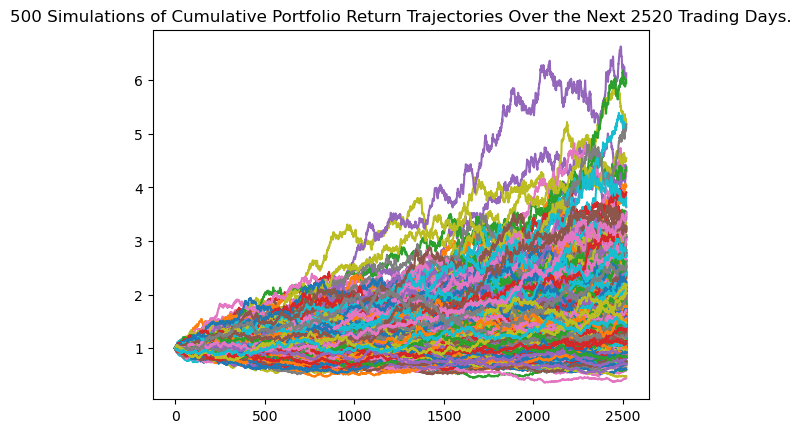

In [92]:
MC_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

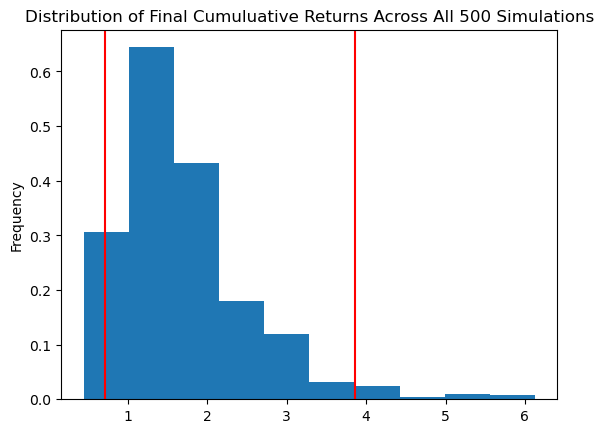

In [93]:
MC_simulation.plot_distribution()

In [94]:
tbl = MC_simulation.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(tbl)

count           500.000000
mean              1.711281
std               0.834863
min               0.443332
25%               1.122470
50%               1.534284
75%               2.056564
max               6.125102
95% CI Lower      0.707704
95% CI Upper      3.861988
Name: 2520, dtype: float64
